# Part 1: Import Libaries and Dataset


## 1. Import libraries and dataset

In [1]:
# Import modules and libraries

# loading dataset from database into Jupyter notebook
import sqlite3
import sqlalchemy

# Import numpy
import numpy as np
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute

# Import pandas
import pandas as pd

# Import datetime modules
from datetime import datetime, timedelta
from time import time

# Import plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sb

# Import scipy
from scipy.stats import norm

# Import models from scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Regression model

from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Extract database from SQL
# creating file path

# creating file path 
dbfile = 'data/score.db'

# dbfile = 'C:/Users/Ron Lim/Documents/Becoming an AI Apprentice/AIAP Batch 9 Application/data/score.db'
# Create a SQL connection to our SQLite database, prompt error if not ok
try:
   conn = sqlite3.connect(dbfile)    
except Error as e:
   print(e)

# creating cursor
cursor = conn.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")]
# print table list
print(f"Table Name : {table_list}")

score = pd.read_sql_query('SELECT * FROM score', conn, index_col = ['index'])

# Close the connection
conn.close()

Table Name : [('score',)]


In [3]:
# Check the number of rows and columns in the data
score.shape

(15900, 17)

In [4]:
# Check the type of data stored in each column
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15900 entries, 0 to 15899
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_siblings  15900 non-null  int64  
 1   direct_admission    15900 non-null  object 
 2   CCA                 15900 non-null  object 
 3   learning_style      15900 non-null  object 
 4   student_id          15900 non-null  object 
 5   gender              15900 non-null  object 
 6   tuition             15900 non-null  object 
 7   final_test          15405 non-null  float64
 8   n_male              15900 non-null  float64
 9   n_female            15900 non-null  float64
 10  age                 15900 non-null  float64
 11  hours_per_week      15900 non-null  float64
 12  attendance_rate     15122 non-null  float64
 13  sleep_time          15900 non-null  object 
 14  wake_time           15900 non-null  object 
 15  mode_of_transport   15900 non-null  object 
 16  bag_

# Part 2: Exploratory Data Analysis (EDA)

# 2. Data cleaning

## 2.1 Remove duplicates on 'student_id'

A total of 900 rows of duplicate to be drop.

In [5]:
# 900 duplicate rows
score[score.duplicated(subset='student_id') == True]

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
index,,,,,,,,,,,,,,,,,
455,2,No,Clubs,Auditory,7OQM9D,Male,No,52.0,21.0,1.0,15.0,19.0,97.0,22:00,6:00,private transport,black
752,0,No,Arts,Visual,PQ059G,Male,No,77.0,23.0,4.0,15.0,6.0,93.0,21:00,5:00,public transport,white
978,1,Yes,Sports,Visual,O5MJ5G,Male,No,44.0,29.0,1.0,16.0,1.0,66.0,0:30,6:30,private transport,blue
1035,1,Yes,None,Visual,W8KTLE,Female,No,57.0,11.0,16.0,15.0,7.0,98.0,22:30,6:30,private transport,red
1090,0,Yes,Clubs,Auditory,2QYBOU,Female,No,72.0,17.0,2.0,6.0,10.0,97.0,21:30,5:30,public transport,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,1,No,Clubs,Visual,1FKAEF,Male,No,61.0,20.0,6.0,16.0,6.0,95.0,21:30,5:30,public transport,yellow
15871,1,No,Arts,Visual,Z9YY3M,Female,No,52.0,25.0,5.0,15.0,18.0,98.0,22:00,6:00,private transport,black
15875,0,No,Clubs,Auditory,MCO9BB,Female,Yes,68.0,17.0,4.0,16.0,13.0,99.0,22:00,6:00,private transport,red


In [6]:
# drop duplicate rows
score.drop_duplicates(subset='student_id', inplace= True, ignore_index= True)

## 2.2 Check for missing values

Columns with missing data:

1. final_test: 463 data point missing
2. attendance_rate: 734 data point missing

Need to study the trend with other features to decide what values to fill them in.

In [7]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_siblings  15000 non-null  int64  
 1   direct_admission    15000 non-null  object 
 2   CCA                 15000 non-null  object 
 3   learning_style      15000 non-null  object 
 4   student_id          15000 non-null  object 
 5   gender              15000 non-null  object 
 6   tuition             15000 non-null  object 
 7   final_test          14537 non-null  float64
 8   n_male              15000 non-null  float64
 9   n_female            15000 non-null  float64
 10  age                 15000 non-null  float64
 11  hours_per_week      15000 non-null  float64
 12  attendance_rate     14266 non-null  float64
 13  sleep_time          15000 non-null  object 
 14  wake_time           15000 non-null  object 
 15  mode_of_transport   15000 non-null  object 
 16  bag_

In [8]:
score.isnull().sum()

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
student_id              0
gender                  0
tuition                 0
final_test            463
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       734
sleep_time              0
wake_time               0
mode_of_transport       0
bag_color               0
dtype: int64

## 2.3 Checking data unique values and look for abnormaly

Abnormaly found:

1. CCA: Repeating CCA in uppercase, need to convert to one standard format.
2. tuition: Yes = Y and No = N, need to convert to one standard format.
3. age: Negative age found, need to study data and fill them accordingly.


In [9]:
for col in score.columns:
    print('{}: {} unique values'.format(col, score[col].nunique()))
    print('Unique values are: ', pd.unique(score[col]), '\n')

number_of_siblings: 3 unique values
Unique values are:  [0 2 1] 

direct_admission: 2 unique values
Unique values are:  ['Yes' 'No'] 

CCA: 8 unique values
Unique values are:  ['Sports' 'None' 'Clubs' 'Arts' 'ARTS' 'SPORTS' 'CLUBS' 'NONE'] 

learning_style: 2 unique values
Unique values are:  ['Visual' 'Auditory'] 

student_id: 15000 unique values
Unique values are:  ['ACN2BE' 'FGXIIZ' 'B9AI9F' ... 'XKZ6VN' '2OU4UQ' 'D9OKLV'] 

gender: 2 unique values
Unique values are:  ['Female' 'Male'] 

tuition: 4 unique values
Unique values are:  ['No' 'Yes' 'Y' 'N'] 

final_test: 68 unique values
Unique values are:  [ 69.  47.  85.  64.  66.  57.  76.  60.  72.  52.  83.  75.  63.  42.
  70.  56.  79.  59.  86.  95.  77.  54.  74.  39.  88.  nan  78.  58.
  45.  53.  71.  92.  62.  81.  49.  82.  48.  51.  40.  65.  55.  50.
  94.  67.  89.  93.  87.  46.  84.  73.  91.  38.  96.  68.  61.  41.
  80.  44.  99.  43.  90.  34. 100.  37.  97.  32.  35.  98.  36.] 

n_male: 32 unique values
Unique va

### 2.3.1 Update 'CCA' column

In [10]:
print('Unique values in CCA column:', pd.unique(score['CCA']))
score.pivot_table('final_test', index='CCA', columns='gender', aggfunc=['mean', 'count'])

Unique values in CCA column: ['Sports' 'None' 'Clubs' 'Arts' 'ARTS' 'SPORTS' 'CLUBS' 'NONE']


mean             count      
gender     Female       Male Female  Male
CCA                                      
ARTS    66.228070  62.109375     57    64
Arts    63.781323  64.400000   1724  1745
CLUBS   62.294118  60.952381     68    63
Clubs   63.681151  64.300000   1772  1800
NONE    78.430769  74.750000     65    52
None    76.858300  76.625993   1729  1762
SPORTS  61.022222  65.553571     45    56
Sports  63.866031  64.288407   1784  1751

In [11]:
# Update 'CCA' feature in 'score' dataframe 

for index in score.index:
#     print('Index: ', index)
    
    if (score.loc[index,'CCA'] == 'ARTS') | (score.loc[index,'CCA'] == 'Arts'):
        score.loc[index,'CCA'] = 'Arts'
    elif (score.loc[index,'CCA'] == 'CLUBS') | (score.loc[index,'CCA'] == 'Clubs') :
        score.loc[index,'CCA'] = 'Clubs'
    elif (score.loc[index,'CCA'] == 'SPORTS') | (score.loc[index,'CCA'] == 'Sports'):
        score.loc[index,'CCA'] = 'Sports'
    elif (score.loc[index,'CCA'] == 'NONE') | (score.loc[index,'CCA'] == 'None'):
        score.loc[index,'CCA'] = 'None'

In [12]:
# Observe that students that join CCA have almost similar test results. We can group them into one category
score.pivot_table('final_test', index='CCA', columns='gender', aggfunc=['mean', 'count'])

mean             count      
gender     Female       Male Female  Male
CCA                                      
Arts    63.859629  64.318961   1781  1809
Clubs   63.629891  64.186795   1840  1863
None    76.915273  76.572216   1794  1814
Sports  63.796063  64.327615   1829  1807

In [13]:
# As seen above cell, students that join CCA have almost similar test results. 
# We can group students with CCA into one category

cca_num = {'Arts': 1, 'Clubs': 1, 'Sports': 1, 'None': 0}

score['CCA'] = score['CCA'].map(cca_num)
score.pivot_table('final_test', index='CCA', columns='gender', aggfunc=['mean', 'count'])

mean             count      
gender     Female       Male Female  Male
CCA                                      
0       76.915273  76.572216   1794  1814
1       63.760734  64.276875   5450  5479

### 2.3.2 Update 'tuition' column

In [14]:
print('Unique values in tuition column:', pd.unique(score['tuition']))
score.pivot_table('final_test', index='tuition', columns='gender', aggfunc=['mean', 'count'])

Unique values in tuition column: ['No' 'Yes' 'Y' 'N']


mean             count      
gender      Female       Male Female  Male
tuition                                   
N        59.721311  63.663717    122   113
No       62.904840  62.943857   3037  3028
Y        71.980769  71.877698    156   139
Yes      70.227793  70.594568   3929  4013

In [15]:
# Map and re-categorize them
tuition_num = {'Yes': 1, 'Y': 1, 'No': 0, 'N': 0}

score['tuition'] = score['tuition'].map(tuition_num)
score.pivot_table('final_test', index='tuition', columns='gender', aggfunc=['mean', 'count'])

mean             count      
gender      Female       Male Female  Male
tuition                                   
0        62.781893  62.969755   3159  3141
1        70.294737  70.637524   4085  4152

### 2.4.3 Update 'age' column

Assumptions: 
1. Students preparing for 'O' levels should be at least 15 years old (Upper Secondary). So, for  it makes sense to change all negative values to either 15 or 16 years old (I a using 15 years old here) 
2. Reassign age for to age that are single digit (<10 years old) by adding 10 years of age to them, it makes sense to change them into 15 and 16 respectively since they are most likely a typo.

In [16]:
print('Unique values in age column:', pd.unique(score['age']))
score.pivot_table('final_test', index='age', columns='gender', aggfunc=['mean', 'count'])

Unique values in age column: [16. 15.  6.  5. -4. -5.]


mean              count        
gender     Female       Male  Female    Male
age                                         
-5.0    64.333333  85.000000     3.0     1.0
-4.0          NaN  48.000000     NaN     1.0
 5.0    66.161905  66.904255   105.0    94.0
 6.0    66.494949  65.598291    99.0   117.0
 15.0   67.340637  66.966025  3514.0  3532.0
 16.0   66.739710  67.771702  3523.0  3548.0

In [17]:
# Update 'age' feature in 'score' dataframe 

for index in score.index:
    if score.loc[index,'age'] < 0:
        score.loc[index,'age'] = 15
    elif score.loc[index,'age'] < 10:
        score.loc[index,'age'] = score.loc[index,'age'] + 10
        
score.pivot_table('final_test', index='age', columns='gender', aggfunc=['mean', 'count'])

mean             count      
gender     Female       Male Female  Male
age                                      
15.0    67.303976  66.964168   3622  3628
16.0    66.733020  67.702319   3622  3665

## 2.4 Identifying Categorical Data: Nominal, Ordinal and Continuous and make necessary conversion

Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be numerical. To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.

### 2.4.1 Convert Nominal and Ordinal into numerical:

1. direct_admission -> Yes: 1, No: 0
2. gender -> Male: 1, Female: 0
3. learning_style -> Visual: 1, Auditory: 0
4. mode_of_transport -> private transport: 0, public transport: 1, walk: 2
5. bag_color is ignored as it does not affect the final_test (label) 

In [18]:
da_num = {'Yes': 1, 'No': 0}
score['direct_admission'] = score['direct_admission'].map(da_num)

gen_num = {'Male': 1, 'Female': 0}
score['gender'] = score['gender'].map(gen_num)

learnsty_num = {'Visual': 1, 'Auditory': 0}
score['learning_style'] = score['learning_style'].map(learnsty_num)

transport_num = {'private transport': 0, 'public transport': 1, 'walk': 2}
score['mode_of_transport'] = score['mode_of_transport'].map(transport_num)

score.head()

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,1,1,1,ACN2BE,0,0,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,0,yellow
1,2,0,1,0,FGXIIZ,0,0,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,0,green
2,0,1,0,1,B9AI9F,1,0,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,0,white
3,1,0,1,0,FEVM1T,0,1,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,1,yellow
4,0,0,1,0,AXZN2E,1,0,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,1,yellow


## 2.5 Creating new features

### 2.5.1 New feature 1: Total sleep time

In [19]:
# Convert time to minutes

# Time a student go to bed
score['slp_time_hr'] = score['sleep_time'].apply(lambda x: x.split(':')[0]).astype(int).apply(lambda x: x*60)
score['slp_time_min'] = score['sleep_time'].apply(lambda x: x.split(':')[1]).astype(int)
score['slp_time_total'] = score['slp_time_hr'] + score['slp_time_min']

# Time a student wakes up
score['wake_time_hr'] = score['wake_time'].apply(lambda x: x.split(':')[0]).astype(int).apply(lambda x: x*60)
score['wake_time_min'] = score['wake_time'].apply(lambda x: x.split(':')[1]).astype(int)
score['wake_time_total'] = score['wake_time_hr'] + score['wake_time_min']

# Total rest time
score['rest_time_min'] = (24*60) - score['slp_time_total'] + score['wake_time_total']

# Convert time to hours

for index in score.index:
    if score.loc[index,'rest_time_min'] >= (24*60):
        score.loc[index,'rest_time_min'] = score.loc[index,'rest_time_min'] - (24*60)

score['rest_time_hr'] = score['rest_time_min']/60
score

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,...,mode_of_transport,bag_color,slp_time_hr,slp_time_min,slp_time_total,wake_time_hr,wake_time_min,wake_time_total,rest_time_min,rest_time_hr
0,0,1,1,1,ACN2BE,0,0,69.0,14.0,2.0,...,0,yellow,1320,0,1320,360,0,360,480,8.0
1,2,0,1,0,FGXIIZ,0,0,47.0,4.0,19.0,...,0,green,1320,30,1350,360,30,390,480,8.0
2,0,1,0,1,B9AI9F,1,0,85.0,14.0,2.0,...,0,white,1320,30,1350,360,30,390,480,8.0
3,1,0,1,0,FEVM1T,0,1,64.0,2.0,20.0,...,1,yellow,1260,0,1260,300,0,300,480,8.0
4,0,0,1,0,AXZN2E,1,0,66.0,24.0,3.0,...,1,yellow,1260,30,1290,300,30,330,480,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,0,1,1,XPECN2,0,0,56.0,12.0,14.0,...,0,black,1320,0,1320,360,0,360,480,8.0
14996,1,1,0,0,7AMC7S,1,1,85.0,17.0,5.0,...,0,white,1320,30,1350,360,30,390,480,8.0
14997,1,1,1,0,XKZ6VN,0,1,76.0,7.0,10.0,...,2,red,1380,0,1380,420,0,420,480,8.0
14998,1,0,1,1,2OU4UQ,1,1,45.0,18.0,12.0,...,2,yellow,1380,0,1380,420,0,420,480,8.0


### 2.5.2 New feature 2: Total classmates each students have (n_male + n_female)

In [20]:
score['total_classmates'] = score['n_male'] + score['n_female']
score

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,...,bag_color,slp_time_hr,slp_time_min,slp_time_total,wake_time_hr,wake_time_min,wake_time_total,rest_time_min,rest_time_hr,total_classmates
0,0,1,1,1,ACN2BE,0,0,69.0,14.0,2.0,...,yellow,1320,0,1320,360,0,360,480,8.0,16.0
1,2,0,1,0,FGXIIZ,0,0,47.0,4.0,19.0,...,green,1320,30,1350,360,30,390,480,8.0,23.0
2,0,1,0,1,B9AI9F,1,0,85.0,14.0,2.0,...,white,1320,30,1350,360,30,390,480,8.0,16.0
3,1,0,1,0,FEVM1T,0,1,64.0,2.0,20.0,...,yellow,1260,0,1260,300,0,300,480,8.0,22.0
4,0,0,1,0,AXZN2E,1,0,66.0,24.0,3.0,...,yellow,1260,30,1290,300,30,330,480,8.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,0,1,1,XPECN2,0,0,56.0,12.0,14.0,...,black,1320,0,1320,360,0,360,480,8.0,26.0
14996,1,1,0,0,7AMC7S,1,1,85.0,17.0,5.0,...,white,1320,30,1350,360,30,390,480,8.0,22.0
14997,1,1,1,0,XKZ6VN,0,1,76.0,7.0,10.0,...,red,1380,0,1380,420,0,420,480,8.0,17.0
14998,1,0,1,1,2OU4UQ,1,1,45.0,18.0,12.0,...,yellow,1380,0,1380,420,0,420,480,8.0,30.0


## 2.6 Remove unneccesary features

In [21]:
score.columns

Index(['number_of_siblings', 'direct_admission', 'CCA', 'learning_style',
       'student_id', 'gender', 'tuition', 'final_test', 'n_male', 'n_female',
       'age', 'hours_per_week', 'attendance_rate', 'sleep_time', 'wake_time',
       'mode_of_transport', 'bag_color', 'slp_time_hr', 'slp_time_min',
       'slp_time_total', 'wake_time_hr', 'wake_time_min', 'wake_time_total',
       'rest_time_min', 'rest_time_hr', 'total_classmates'],
      dtype='object')

In [22]:
# Clean stage 1: remove features with similar information after creating new features from them
# Also remove features that does not have much values to our study
score_clean = score.drop(['student_id', 'age', 'mode_of_transport', 'n_male', 'n_female', 'sleep_time', 'wake_time', 'slp_time_hr', 'slp_time_min', 'slp_time_total', 'wake_time_hr', 'wake_time_min', 'wake_time_total', 'bag_color', 'rest_time_min'], axis = 1, inplace= False)
score_clean

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,hours_per_week,attendance_rate,rest_time_hr,total_classmates
0,0,1,1,1,0,0,69.0,10.0,91.0,8.0,16.0
1,2,0,1,0,0,0,47.0,7.0,94.0,8.0,23.0
2,0,1,0,1,1,0,85.0,8.0,92.0,8.0,16.0
3,1,0,1,0,0,1,64.0,18.0,NaN,8.0,22.0
4,0,0,1,0,1,0,66.0,7.0,95.0,8.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,1,0,1,1,0,0,56.0,9.0,96.0,8.0,26.0
14996,1,1,0,0,1,1,85.0,7.0,91.0,8.0,22.0
14997,1,1,1,0,0,1,76.0,7.0,93.0,8.0,17.0
14998,1,0,1,1,1,1,45.0,3.0,94.0,8.0,30.0


## 3. Continuous features

In [23]:
score_con = score_clean[['number_of_siblings', 'final_test', 'hours_per_week', 'attendance_rate', 'rest_time_hr', 'total_classmates']]
score_con

,number_of_siblings,final_test,hours_per_week,attendance_rate,rest_time_hr,total_classmates
0,0,69.0,10.0,91.0,8.0,16.0
1,2,47.0,7.0,94.0,8.0,23.0
2,0,85.0,8.0,92.0,8.0,16.0
3,1,64.0,18.0,NaN,8.0,22.0
4,0,66.0,7.0,95.0,8.0,27.0
...,...,...,...,...,...,...
14995,1,56.0,9.0,96.0,8.0,26.0
14996,1,85.0,7.0,91.0,8.0,22.0
14997,1,76.0,7.0,93.0,8.0,17.0
14998,1,45.0,3.0,94.0,8.0,30.0


In [24]:
score_con.describe()

,number_of_siblings,final_test,hours_per_week,attendance_rate,rest_time_hr,total_classmates
count,15000.000000,14537.000000,15000.000000,14266.000000,15000.000000,15000.000000
mean,0.888000,67.177341,10.321067,93.286135,7.847600,22.781867
std,0.751284,13.976440,4.461596,7.947329,0.599776,4.230872
min,0.000000,32.000000,0.000000,40.000000,4.000000,14.000000
25%,0.000000,56.000000,7.000000,92.000000,8.000000,20.000000
50%,1.000000,68.000000,9.000000,95.000000,8.000000,22.000000
75%,1.000000,78.000000,14.000000,97.000000,8.000000,27.000000
max,2.000000,100.000000,20.000000,100.000000,8.000000,31.000000


## 3.1 Continuous features: Check for correlation between 

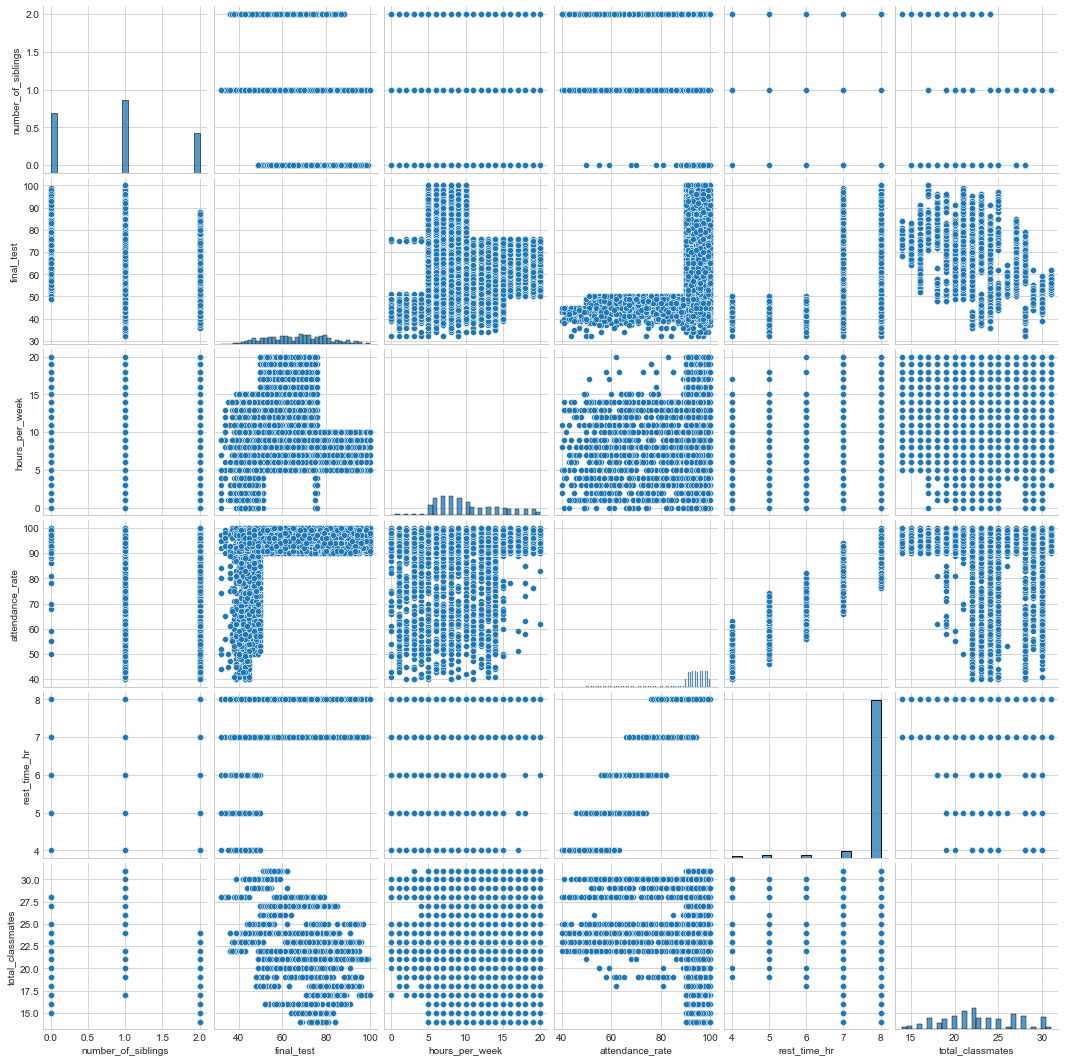

In [25]:
# Observe a relationship between rest_time_hr and attendance_rate
sb.pairplot(score_con)

<AxesSubplot:>

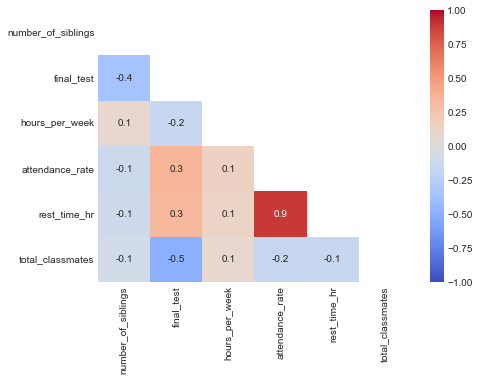

In [26]:
# confirm a strong correlation between rest_time_hr and attendance_rate
matrix = np.triu(score_con.corr())

plt.figure(figsize = (7,5))
sb.heatmap(score_con.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

## 3.2 Dealing with NULL data in continuous features

We need to study and see if features values are missing at ramdom:
1. If they are missing at random, we can just replace them with reasonable value (say mean value). Some features will not sway the model in one way or another and does not have critical meaning in the dataset.

2. If features that they are NOT missing at random, we need to see how other features are correlated to it before deciding how to fill in the missing values.

Replace Null values for features: 

* 'attendance_rate' --> Correlate with no. of sleeping hours (rest_time_hr)
* 'final_test' --> Missing at random (no significant corrlation)

In [27]:
# we can use rest_time_hr feature to predict missing attendance rate since they are highly correlated
# We can assign the mean values of 'attendance_rate' for each value of 'rest_time_hr' to missing attendance_rate

rt_ar = score_clean.groupby(['rest_time_hr']).agg({'attendance_rate': ['mean','count']})
rt_ar

attendance_rate       
                        mean  count
rest_time_hr                       
4.0                49.367647    136
5.0                58.392344    209
6.0                67.353774    212
7.0                87.037415    588
8.0                94.996189  13121

In [28]:
# fill missing attendance_rate with mean values of 'attendance_rate' for each value of 'rest_time_hr' to 

for index in score_clean.index:
#     print('Updated index loacation: ', index)
        
    if np.isnan(score_clean.loc[index, 'attendance_rate']):
        if (score_clean.loc[index,'rest_time_hr'] == 4):
            score_clean.loc[index,'attendance_rate'] = 49
            print('Update index [', index, ']attenadance rate to: 49')
            
        elif (score_clean.loc[index,'rest_time_hr'] == 5):
            score_clean.loc[index,'attendance_rate'] = 58
            print('Update index [', index, ']attenadance rate to: 58')
            
        elif (score_clean.loc[index,'rest_time_hr'] == 6):
            score_clean.loc[index,'attendance_rate'] = 67
            print('Update index [', index, ']attenadance rate to: 67')
            
        elif (score_clean.loc[index,'rest_time_hr'] == 7):
            score_clean.loc[index,'attendance_rate'] = 87
            print('Update index [', index, ']attenadance rate to: 87')
            
        elif (score_clean.loc[index,'rest_time_hr'] == 8):
            score_clean.loc[index,'attendance_rate'] = 95
            print('Update index [', index, ']attenadance rate to: 95')

Update index [ 3 ]attenadance rate to: 95
Update index [ 9 ]attenadance rate to: 95
Update index [ 58 ]attenadance rate to: 95
Update index [ 62 ]attenadance rate to: 95
Update index [ 85 ]attenadance rate to: 95
Update index [ 88 ]attenadance rate to: 95
Update index [ 90 ]attenadance rate to: 95
Update index [ 207 ]attenadance rate to: 95
Update index [ 225 ]attenadance rate to: 95
Update index [ 231 ]attenadance rate to: 95
Update index [ 258 ]attenadance rate to: 95
Update index [ 272 ]attenadance rate to: 95
Update index [ 334 ]attenadance rate to: 95
Update index [ 355 ]attenadance rate to: 95
Update index [ 367 ]attenadance rate to: 95
Update index [ 376 ]attenadance rate to: 95
Update index [ 377 ]attenadance rate to: 95
Update index [ 438 ]attenadance rate to: 95
Update index [ 475 ]attenadance rate to: 95
Update index [ 488 ]attenadance rate to: 95
Update index [ 511 ]attenadance rate to: 95
Update index [ 548 ]attenadance rate to: 95
Update index [ 551 ]attenadance rate to: 

Update index [ 4018 ]attenadance rate to: 95
Update index [ 4039 ]attenadance rate to: 95
Update index [ 4045 ]attenadance rate to: 95
Update index [ 4067 ]attenadance rate to: 87
Update index [ 4068 ]attenadance rate to: 95
Update index [ 4069 ]attenadance rate to: 95
Update index [ 4079 ]attenadance rate to: 95
Update index [ 4090 ]attenadance rate to: 95
Update index [ 4141 ]attenadance rate to: 95
Update index [ 4158 ]attenadance rate to: 95
Update index [ 4171 ]attenadance rate to: 95
Update index [ 4175 ]attenadance rate to: 95
Update index [ 4177 ]attenadance rate to: 95
Update index [ 4222 ]attenadance rate to: 95
Update index [ 4231 ]attenadance rate to: 95
Update index [ 4239 ]attenadance rate to: 95
Update index [ 4257 ]attenadance rate to: 95
Update index [ 4298 ]attenadance rate to: 95
Update index [ 4323 ]attenadance rate to: 95
Update index [ 4325 ]attenadance rate to: 95
Update index [ 4331 ]attenadance rate to: 95
Update index [ 4342 ]attenadance rate to: 95
Update ind

Update index [ 7866 ]attenadance rate to: 95
Update index [ 7877 ]attenadance rate to: 95
Update index [ 7884 ]attenadance rate to: 95
Update index [ 7891 ]attenadance rate to: 95
Update index [ 7898 ]attenadance rate to: 95
Update index [ 7902 ]attenadance rate to: 95
Update index [ 7906 ]attenadance rate to: 95
Update index [ 7915 ]attenadance rate to: 67
Update index [ 7921 ]attenadance rate to: 95
Update index [ 7941 ]attenadance rate to: 95
Update index [ 7950 ]attenadance rate to: 95
Update index [ 7953 ]attenadance rate to: 95
Update index [ 7969 ]attenadance rate to: 95
Update index [ 7988 ]attenadance rate to: 95
Update index [ 8008 ]attenadance rate to: 95
Update index [ 8009 ]attenadance rate to: 95
Update index [ 8024 ]attenadance rate to: 95
Update index [ 8027 ]attenadance rate to: 95
Update index [ 8032 ]attenadance rate to: 95
Update index [ 8093 ]attenadance rate to: 95
Update index [ 8109 ]attenadance rate to: 95
Update index [ 8135 ]attenadance rate to: 95
Update ind

Update index [ 12165 ]attenadance rate to: 95
Update index [ 12173 ]attenadance rate to: 95
Update index [ 12178 ]attenadance rate to: 95
Update index [ 12189 ]attenadance rate to: 95
Update index [ 12203 ]attenadance rate to: 95
Update index [ 12228 ]attenadance rate to: 95
Update index [ 12274 ]attenadance rate to: 95
Update index [ 12296 ]attenadance rate to: 95
Update index [ 12311 ]attenadance rate to: 95
Update index [ 12347 ]attenadance rate to: 95
Update index [ 12359 ]attenadance rate to: 95
Update index [ 12361 ]attenadance rate to: 95
Update index [ 12447 ]attenadance rate to: 95
Update index [ 12463 ]attenadance rate to: 95
Update index [ 12491 ]attenadance rate to: 95
Update index [ 12494 ]attenadance rate to: 95
Update index [ 12511 ]attenadance rate to: 95
Update index [ 12534 ]attenadance rate to: 58
Update index [ 12535 ]attenadance rate to: 95
Update index [ 12633 ]attenadance rate to: 95
Update index [ 12636 ]attenadance rate to: 95
Update index [ 12666 ]attenadance 

In [29]:
# No obvious relationship between the 'total_classmate' and 'final_test'
# treat as 'missing at random'
# we can just replace them with 'final_test' mean values

cm_ft = score_clean.groupby(['total_classmates']).agg({'final_test': ['mean','count']})
cm_ft
print(cm_ft.to_string())

                 final_test      
                       mean count
total_classmates                 
14.0              76.532164   171
15.0              75.325000   320
16.0              72.483940   467
17.0              82.645367   939
18.0              75.442460   504
19.0              72.613636   880
20.0              68.813725  1122
21.0              75.394942  1542
22.0              65.396311  1789
23.0              72.046638   922
24.0              58.670408   980
25.0              64.012673   868
26.0              56.656085   189
27.0              64.177011  1305
28.0              62.003620  1105
29.0              50.147368   190
30.0              50.021339  1031
31.0              56.183099   213


In [30]:
# print('{}: {} unique values'.format(col, score[col].nunique()))
print('Unique values are: ', pd.unique(score_clean['final_test']), '\n')

Unique values are:  [ 69.  47.  85.  64.  66.  57.  76.  60.  72.  52.  83.  75.  63.  42.
  70.  56.  79.  59.  86.  95.  77.  54.  74.  39.  88.  nan  78.  58.
  45.  53.  71.  92.  62.  81.  49.  82.  48.  51.  40.  65.  55.  50.
  94.  67.  89.  93.  87.  46.  84.  73.  91.  38.  96.  68.  61.  41.
  80.  44.  99.  43.  90.  34. 100.  37.  97.  32.  35.  98.  36.] 



In [31]:
score_clean.isnull().sum()

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
gender                  0
tuition                 0
final_test            463
hours_per_week          0
attendance_rate         0
rest_time_hr            0
total_classmates        0
dtype: int64

In [32]:
# mean value of 'final_test' = 67.177341
score.groupby(score_clean['final_test'].isnull()).mean()

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,...,mode_of_transport,slp_time_hr,slp_time_min,slp_time_total,wake_time_hr,wake_time_min,wake_time_total,rest_time_min,rest_time_hr,total_classmates
final_test,,,,,,,,,,,,,,,,,,,,,
False,0.888698,0.293871,0.751806,0.424159,0.501685,0.566623,67.177341,13.859737,8.920685,15.501273,...,0.802091,1258.336658,11.833253,1270.169911,348.117218,11.833253,359.950471,470.841302,7.847355,22.780422
True,0.866091,0.326134,0.736501,0.429806,0.481641,0.570194,NaN,13.969762,8.857451,15.488121,...,0.883369,1258.963283,11.533477,1270.496760,349.373650,11.533477,360.907127,471.317495,7.855292,22.827214


In [33]:
score_clean['final_test'].mean()
round(score_clean['final_test'].mean())

67

In [34]:
# score_clean['final_test'] = score_clean['final_test'].fillna(round(score_clean['final_test'].mean()))
score_clean['final_test'] = score_clean['final_test'].fillna(score_clean['final_test'].mean())
score_clean

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,hours_per_week,attendance_rate,rest_time_hr,total_classmates
0,0,1,1,1,0,0,69.0,10.0,91.0,8.0,16.0
1,2,0,1,0,0,0,47.0,7.0,94.0,8.0,23.0
2,0,1,0,1,1,0,85.0,8.0,92.0,8.0,16.0
3,1,0,1,0,0,1,64.0,18.0,95.0,8.0,22.0
4,0,0,1,0,1,0,66.0,7.0,95.0,8.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,1,0,1,1,0,0,56.0,9.0,96.0,8.0,26.0
14996,1,1,0,0,1,1,85.0,7.0,91.0,8.0,22.0
14997,1,1,1,0,0,1,76.0,7.0,93.0,8.0,17.0
14998,1,0,1,1,1,1,45.0,3.0,94.0,8.0,30.0


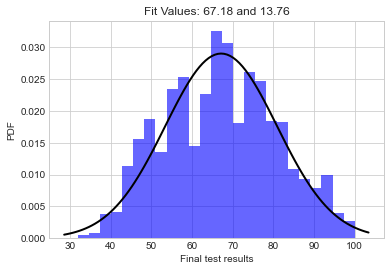

In [35]:
# Fit a normal distribution to the data: mean and standard deviation
mu, std = norm.fit(score_clean['final_test']) 

plt.hist(score_clean['final_test'], bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.xlabel('Final test results')
plt.ylabel('PDF')
plt.title(title)
  
plt.show()

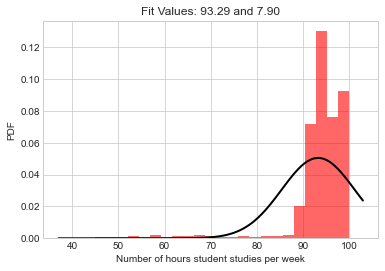

In [36]:
# Fit a normal distribution to the data: mean and standard deviation
mu, std = norm.fit(score_clean['attendance_rate']) 

plt.hist(score_clean['attendance_rate'], bins=25, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.xlabel('Number of hours student studies per week')
plt.ylabel('PDF')
plt.title(title)
  
plt.show()

<AxesSubplot:>

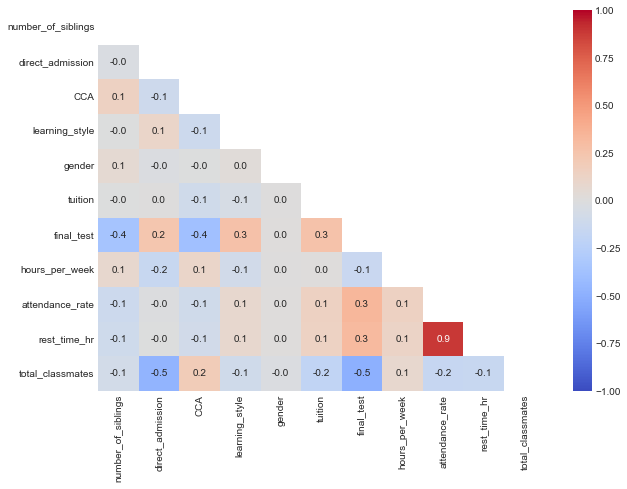

In [37]:
matrix = np.triu(score_clean.corr())

plt.figure(figsize = (10,7))
sb.heatmap(score_clean.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

In [38]:
# Missing values for features 'final_test' and 'attendance_rate'
score_clean.isnull().sum()

number_of_siblings    0
direct_admission      0
CCA                   0
learning_style        0
gender                0
tuition               0
final_test            0
hours_per_week        0
attendance_rate       0
rest_time_hr          0
total_classmates      0
dtype: int64

## 3.3 Bining for continuous labels for Classification modeling later

After filling up NULL values,  we can do binning for our label (target) for fitting onto Classification modeling later.

#### Binning scheme for final test:

* 0: fail (final_test < 50)
* 1: pass (final_test >= 50)

In [39]:
# define the bin boundaries and labels to use
bins = [0,49,100]
labels = [0, 1]

result_bin = pd.cut(score_clean['final_test'],bins=bins, labels=labels)
result_bin

0        1
1        0
2        1
3        1
4        1
        ..
14995    1
14996    1
14997    1
14998    0
14999    1
Name: final_test, Length: 15000, dtype: category
Categories (2, int64): [0 < 1]

In [40]:
score_clean['final_test_bin'] = result_bin
score_clean

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,hours_per_week,attendance_rate,rest_time_hr,total_classmates,final_test_bin
0,0,1,1,1,0,0,69.0,10.0,91.0,8.0,16.0,1
1,2,0,1,0,0,0,47.0,7.0,94.0,8.0,23.0,0
2,0,1,0,1,1,0,85.0,8.0,92.0,8.0,16.0,1
3,1,0,1,0,0,1,64.0,18.0,95.0,8.0,22.0,1
4,0,0,1,0,1,0,66.0,7.0,95.0,8.0,27.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,0,1,1,0,0,56.0,9.0,96.0,8.0,26.0,1
14996,1,1,0,0,1,1,85.0,7.0,91.0,8.0,22.0,1
14997,1,1,1,0,0,1,76.0,7.0,93.0,8.0,17.0,1
14998,1,0,1,1,1,1,45.0,3.0,94.0,8.0,30.0,0


In [41]:
score_clean.groupby(['final_test_bin']).agg({'final_test': ['mean','count']})


final_test       
                     mean  count
final_test_bin                  
0               45.031017   1741
1               70.085309  13259

## 4. Categorical Features

In [42]:
score_cat = score_clean[['direct_admission', 'final_test', 'final_test_bin', 'CCA', 'learning_style', 'gender', 'tuition']]
score_cat

,direct_admission,final_test,final_test_bin,CCA,learning_style,gender,tuition
0,1,69.0,1,1,1,0,0
1,0,47.0,0,1,0,0,0
2,1,85.0,1,0,1,1,0
3,0,64.0,1,1,0,0,1
4,0,66.0,1,1,0,1,0
...,...,...,...,...,...,...,...
14995,0,56.0,1,1,1,0,0
14996,1,85.0,1,0,0,1,1
14997,1,76.0,1,1,0,0,1
14998,0,45.0,0,1,1,1,1


In [43]:
score_cat.describe()

,direct_admission,final_test,CCA,learning_style,gender,tuition
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.294867,67.177341,0.751333,0.424333,0.501067,0.566733
std,0.455998,13.759031,0.432255,0.494258,0.500016,0.495543
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,67.177341,1.000000,0.000000,1.000000,1.000000
75%,1.000000,77.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000


## 4.1 Check for correlation between categorical features

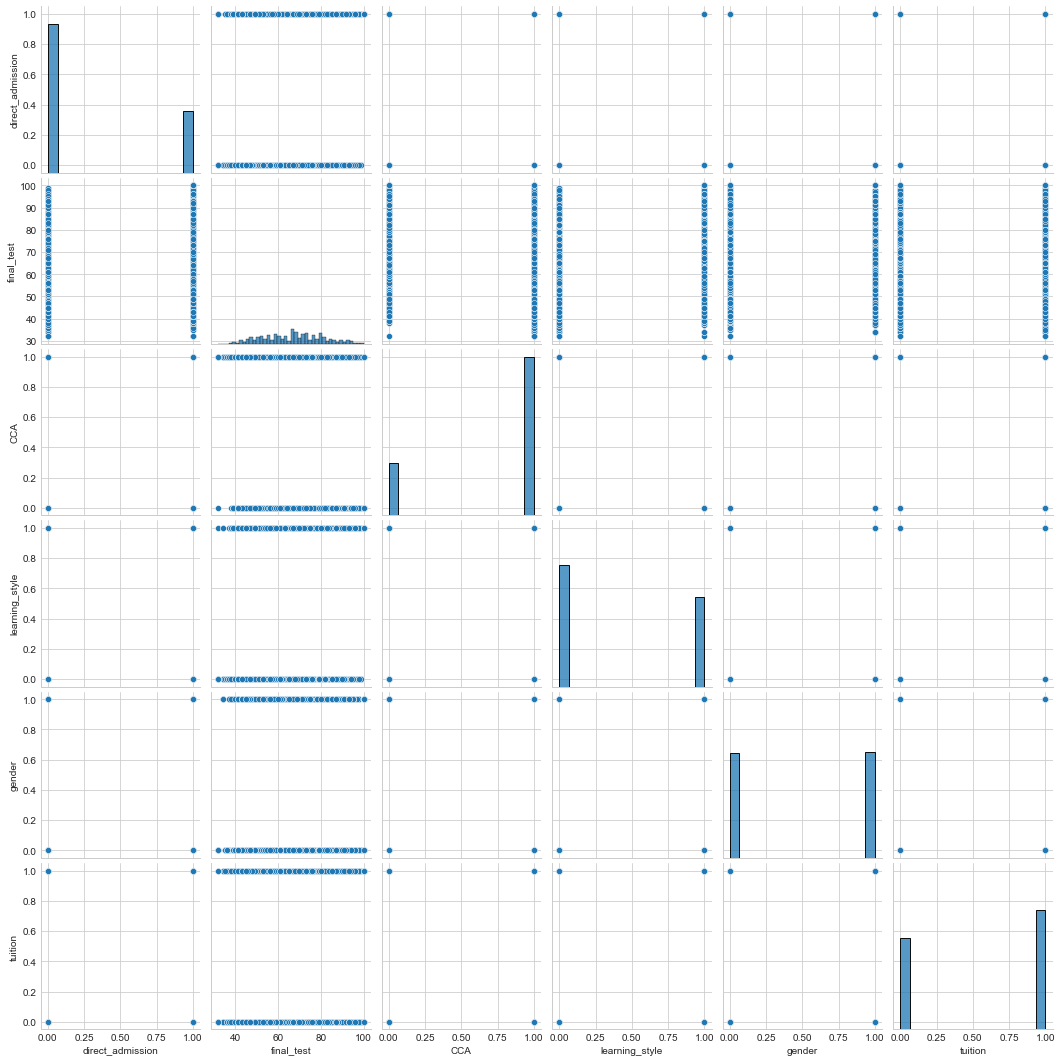

In [44]:
# Observe a relationship between (CCA, tuition, leaening_style) and final_test
sb.pairplot(score_cat)

<AxesSubplot:>

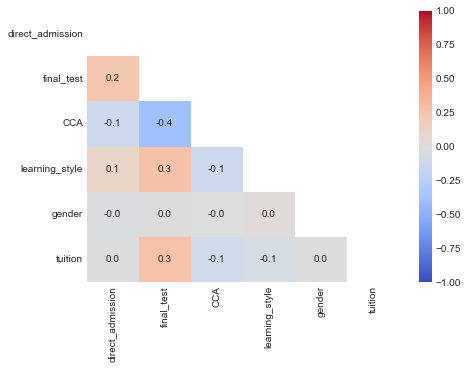

In [45]:
matrix = np.triu(score_cat.corr())

plt.figure(figsize = (7,5))
sb.heatmap(score_cat.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

## 5. Visualize how the features relate to the target (final_test)

Generate categorical plots for categorical/ ordinal features from seaborn

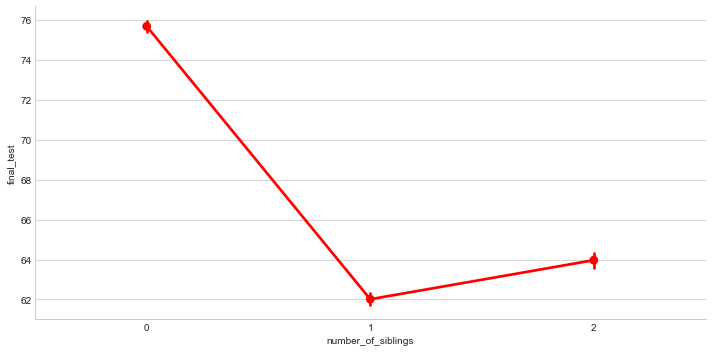

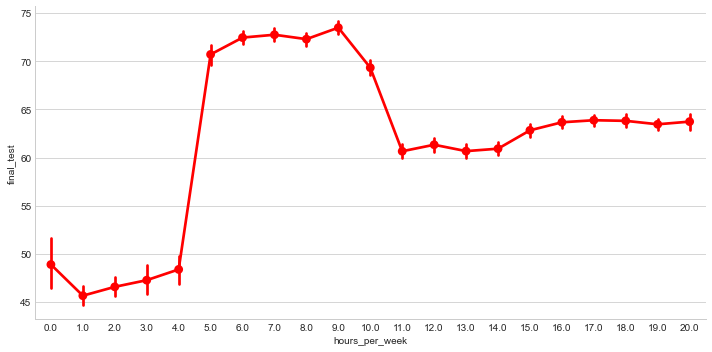

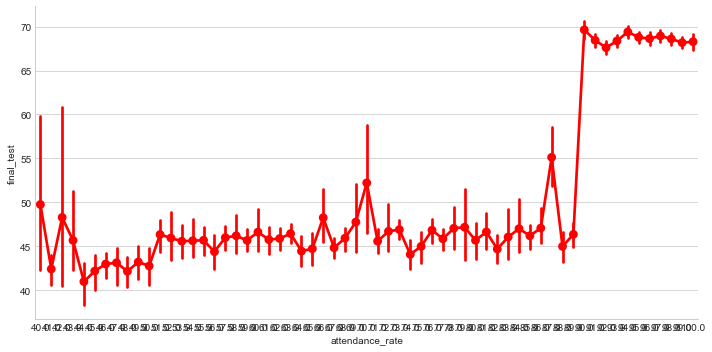

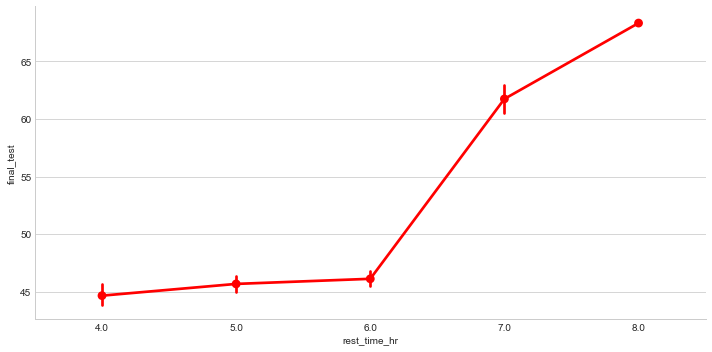

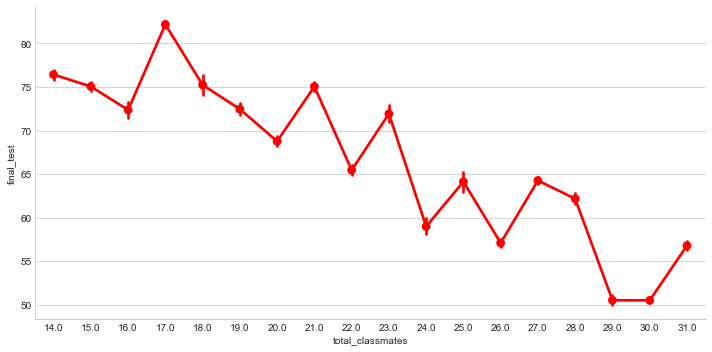

In [46]:
# Plotting for continuous features
for col in ['number_of_siblings', 'hours_per_week', 'attendance_rate', 'rest_time_hr', 'total_classmates']:
    sb.catplot(x=col, y='final_test', data=score_clean, kind='point', aspect=2, color='r')

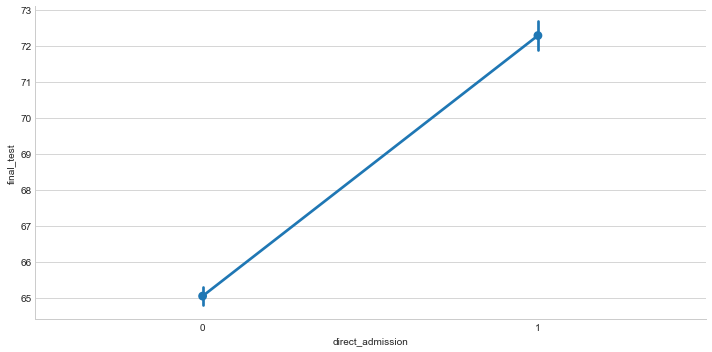

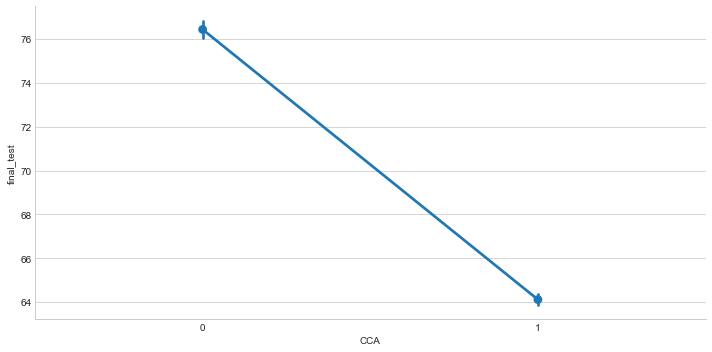

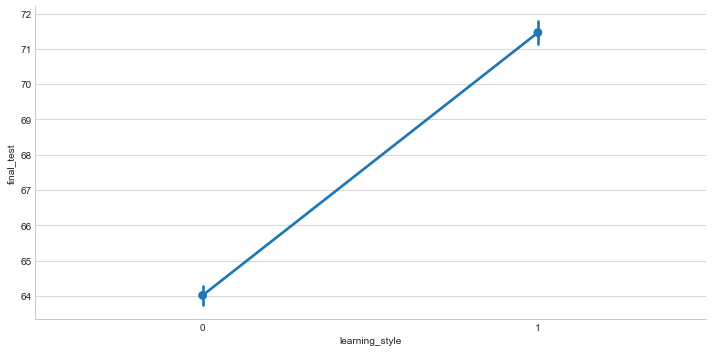

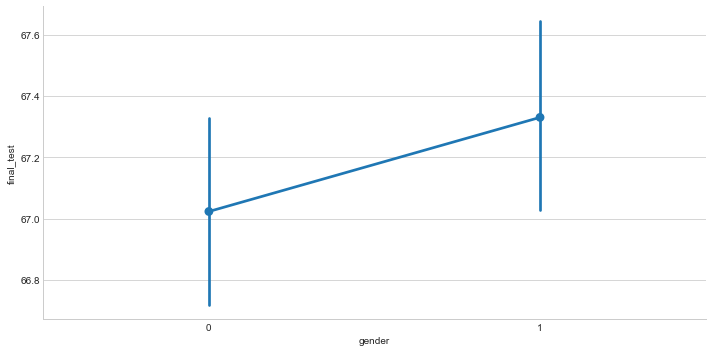

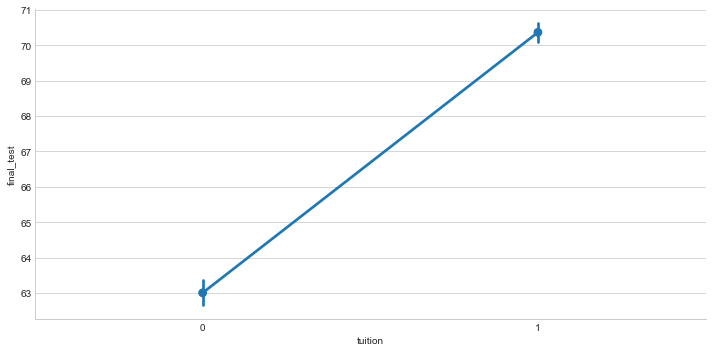

In [47]:
# Plotting for categorical features
for col in ['direct_admission', 'CCA', 'learning_style', 'gender', 'tuition']:
    sb.catplot(x=col, y='final_test', data=score_clean, kind='point', aspect=2)

## 6. Pipeline: Split data into train, validation, and test set

### Load the cleaned data set for building models

In this section, we will split the data into train, validation, and test set in preparation for fitting a basic model in the next section.

In [48]:
features = score_clean.drop(['final_test', 'final_test_bin'], axis=1)
labels = score_clean[['final_test', 'final_test_bin']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [49]:
# Check data are split correctly into train, validation and test set with 60%, 20%, 20% respectively
for dataset in [y_train, y_val, y_test]:
    print('Data is split into', round((len(dataset) / len(labels))*100, 2), '%, having', len(dataset), 'data.')

Data is split into 60.0 %, having 9000 data.
Data is split into 20.0 %, having 3000 data.
Data is split into 20.0 %, having 3000 data.


In [50]:
y_train_con = y_train['final_test']
y_train_cat = y_train['final_test_bin']

y_val_con = y_val['final_test']
y_val_cat = y_val['final_test_bin']

y_test_con = y_test['final_test']
y_test_cat = y_test['final_test_bin']

# Part 2: Machine Learning Models


## Functions that we will be using to access the model performance.

In [51]:
# Function to seach for Hyperparamaters using GridSearchCV for model optimization 

def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()
    
    means = gd_model.cv_results_['mean_test_score']
    stds = gd_model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gd_model.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 7), round(std * 2, 3), params))
    
    print('\nBEST PARAMS: {}\n'.format(gd_model.best_params_))
    

In [52]:
# function to show ranking of importance feature for model used
def print_impt_feat(test_model, col):
    model = test_model
    feat_imp = model.best_estimator_.feature_importances_
    indices = np.argsort(feat_imp)
    plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
    plt.barh(range(len(indices)), feat_imp[indices], color=col, align='center')
    plt.show()

In [53]:
# function to evaluate performance of classifier: accuracy, precision and recall

def evaluate_model(name, model, features, labels):
    start = time() # calculate how long it takes to make those predictions
    pred = model.predict(features)
    end = time()
    
    # then we compare model prediciton and model labels using accuracy, precision and recall
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [54]:
# function for classification model to generate classification report and confusion matrix

def cls_report_confusion_matrix(test_model):
    model = test_model
    y_pred_dt = model.predict(X_train)
    print(classification_report(y_train_cat, y_pred_dt))
    cm = confusion_matrix(y_train_cat, y_pred_dt)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cv_dt_clf.classes_)
    disp.plot(cmap= 'YlOrBr')

# 7. Regression Modeling

## 7.1 Decision Tree Regressor model

In [55]:
# DecisionTreeRegressor() model

dt = DecisionTreeRegressor(random_state=0)

#fit model
dt = dt.fit(X_train,y_train_con.values.ravel())
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)
y_test_pred = dt.predict(X_test)

#print score
print('dt train score %.3f\ndt validation score %.3f\ndt test score: %.3f' % (
    dt.score(X_train,y_train_con), dt.score(X_val, y_val_con), dt.score(X_test, y_test_con)))

dt train score 0.980
dt validation score 0.661
dt test score: 0.664


In [56]:
# Search for hypermeter using GridSearch for Decision Tree Regressor optimization

param_grid_dt = dict(min_samples_leaf=np.arange(9, 13, 1, int), 
                  max_depth = np.arange(4,7,1, int),
                  min_impurity_decrease = [0, 1, 2],
                 )

dt = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid_dt, cv=5,  verbose=3)

#fit model
dt = dt.fit(X_train,y_train_con.values.ravel())

#print score
print('\n\ndt train score %.3f\ndt validation score %.3f\ndt test score: %.3f' % (
    dt.score(X_train,y_train_con), dt.score(X_val,y_val_con), dt.score(X_test, y_test_con)))

print_best_params(dt)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.669 total time=   0.0s
[CV 2/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.686 total time=   0.0s
[CV 3/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.672 total time=   0.0s
[CV 4/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.696 total time=   0.0s
[CV 5/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.654 total time=   0.0s
[CV 1/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.669 total time=   0.0s
[CV 2/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.686 total time=   0.0s
[CV 3/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.672 total time=   0.0s
[CV 4/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.696 total time=   0.0s
[CV 5/5

[CV 4/5] END max_depth=5, min_impurity_decrease=1, min_samples_leaf=9;, score=0.710 total time=   0.0s
[CV 5/5] END max_depth=5, min_impurity_decrease=1, min_samples_leaf=9;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=5, min_impurity_decrease=1, min_samples_leaf=10;, score=0.681 total time=   0.0s
[CV 2/5] END max_depth=5, min_impurity_decrease=1, min_samples_leaf=10;, score=0.707 total time=   0.0s
[CV 3/5] END max_depth=5, min_impurity_decrease=1, min_samples_leaf=10;, score=0.694 total time=   0.0s
[CV 4/5] END max_depth=5, min_impurity_decrease=1, min_samples_leaf=10;, score=0.710 total time=   0.0s
[CV 5/5] END max_depth=5, min_impurity_decrease=1, min_samples_leaf=10;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=5, min_impurity_decrease=1, min_samples_leaf=11;, score=0.681 total time=   0.0s
[CV 2/5] END max_depth=5, min_impurity_decrease=1, min_samples_leaf=11;, score=0.707 total time=   0.0s
[CV 3/5] END max_depth=5, min_impurity_decrease=1, min_samples_lea

[CV 3/5] END max_depth=6, min_impurity_decrease=2, min_samples_leaf=11;, score=0.654 total time=   0.0s
[CV 4/5] END max_depth=6, min_impurity_decrease=2, min_samples_leaf=11;, score=0.678 total time=   0.0s
[CV 5/5] END max_depth=6, min_impurity_decrease=2, min_samples_leaf=11;, score=0.638 total time=   0.0s
[CV 1/5] END max_depth=6, min_impurity_decrease=2, min_samples_leaf=12;, score=0.653 total time=   0.0s
[CV 2/5] END max_depth=6, min_impurity_decrease=2, min_samples_leaf=12;, score=0.668 total time=   0.0s
[CV 3/5] END max_depth=6, min_impurity_decrease=2, min_samples_leaf=12;, score=0.654 total time=   0.0s
[CV 4/5] END max_depth=6, min_impurity_decrease=2, min_samples_leaf=12;, score=0.678 total time=   0.0s
[CV 5/5] END max_depth=6, min_impurity_decrease=2, min_samples_leaf=12;, score=0.638 total time=   0.0s


dt train score 0.752
dt validation score 0.717
dt test score: 0.741

*** DecisionTreeRegressor Best Parameters ***
ccp_alpha: 0.0
criterion: mse
max_depth: 6
max_feat


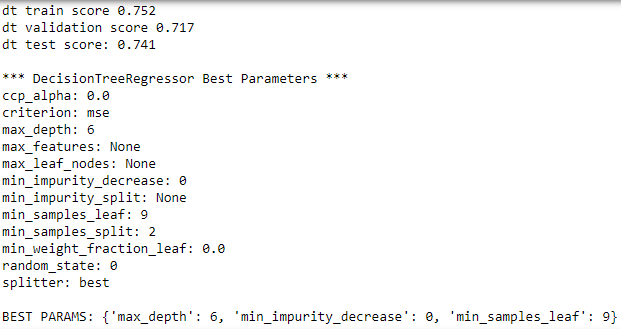

Top 3 best hyperparameter:

1. 0.7436067 (+/-0.024) for {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_leaf': 9}
2. 0.7432331 (+/-0.023) for {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_leaf': 10}
3. 0.7425602 (+/-0.025) for {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_leaf': 11}

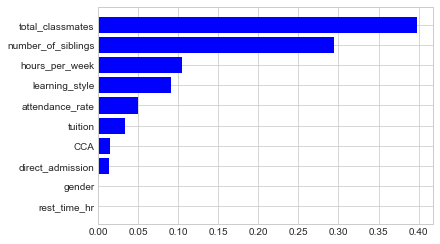

In [57]:
print_impt_feat(dt, 'b')

## 7.1.1 Decision Tree: Use top 3 best hyperparameter to evaluate results on validation set

In [58]:
# Best 3 Decision Tree Model
dt1 = DecisionTreeRegressor(max_depth=6, min_impurity_decrease=0, min_samples_leaf=9)
dt1.fit(X_train, y_train_con.values.ravel())

dt2 = DecisionTreeRegressor(max_depth=6, min_impurity_decrease=0, min_samples_leaf=10)
dt2.fit(X_train, y_train_con.values.ravel())

dt3 = DecisionTreeRegressor(max_depth=6, min_impurity_decrease=0, min_samples_leaf=11)
dt3.fit(X_train, y_train_con.values.ravel())


DecisionTreeRegressor(max_depth=6, min_impurity_decrease=0, min_samples_leaf=11)

In [59]:
# Fit validation set into Best 3 Random Forest Model and find the best model

for mdl in [dt1, dt2, dt3]:
    y_pred = mdl.predict(X_val)
    r2 = round(r2_score(y_val_con, y_pred),5)
    mae = round(mean_absolute_error(y_val_con, y_pred),5)
    mse = round(mean_squared_error(y_val_con, y_pred),5)
    print('MAX DEPTH: {} / min_impurity_decrease: {} / min_samples_leaf: {}'.format(mdl.max_depth, mdl.min_impurity_decrease, mdl.min_samples_leaf))
    print('r2_score: {} / mean_absolute_error: {} / mean_squared_error: {}\n'.format(r2, mae, mse))

MAX DEPTH: 6 / min_impurity_decrease: 0 / min_samples_leaf: 9
r2_score: 0.71718 / mean_absolute_error: 5.24012 / mean_squared_error: 53.47446

MAX DEPTH: 6 / min_impurity_decrease: 0 / min_samples_leaf: 10
r2_score: 0.71702 / mean_absolute_error: 5.24011 / mean_squared_error: 53.50527

MAX DEPTH: 6 / min_impurity_decrease: 0 / min_samples_leaf: 11
r2_score: 0.71702 / mean_absolute_error: 5.24011 / mean_squared_error: 53.50527



Best model from validation set: dt1

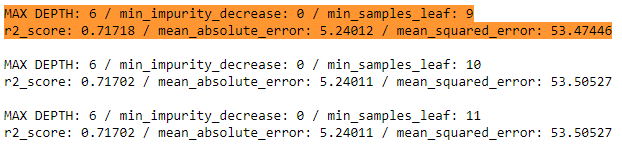

## 7.1.2 Decision Tree: Evaluate test set on the best 3 model to confirm the performance of validation set   
    

In [60]:
# Fit test set into Best 3 Decision Tree Model and see if the results matches the validation set

for mdl in [dt1, dt2, dt3]:
    y_pred = mdl.predict(X_test)
    r2 = round(r2_score(y_test_con, y_pred),5)
    mae = round(mean_absolute_error(y_test_con, y_pred),5)
    mse = round(mean_squared_error(y_test_con, y_pred),5)
    print('MAX DEPTH: {} / min_impurity_decrease: {} / min_samples_leaf: {}'.format(mdl.max_depth, mdl.min_impurity_decrease, mdl.min_samples_leaf))
    print('r2_score: {} / mean_absolute_error: {} / mean_squared_error: {}\n'.format(r2, mae, mse))

MAX DEPTH: 6 / min_impurity_decrease: 0 / min_samples_leaf: 9
r2_score: 0.74069 / mean_absolute_error: 5.01676 / mean_squared_error: 48.96222

MAX DEPTH: 6 / min_impurity_decrease: 0 / min_samples_leaf: 10
r2_score: 0.74066 / mean_absolute_error: 5.01618 / mean_squared_error: 48.9675

MAX DEPTH: 6 / min_impurity_decrease: 0 / min_samples_leaf: 11
r2_score: 0.74066 / mean_absolute_error: 5.01618 / mean_squared_error: 48.9675



Results from test set is similar to validation set. Hence the best model here is dt1.

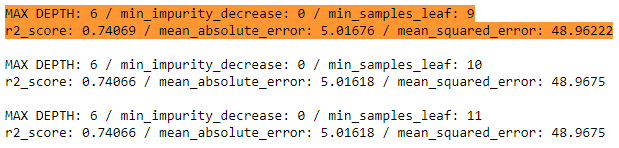

# 7.2 Random Forest Regressor model

In [61]:
# RandomForestRegressor() model
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
#fit model
forest.fit(X_train,y_train_con.values.ravel())
y_train_pred = forest.predict(X_train)
y_val_pred = forest.predict(X_val)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f\nforest validation score %.3f\nforest test score: %.3f' % (
    forest.score(X_train,y_train_con), forest.score(X_val, y_val_con), forest.score(X_test, y_test_con)))

forest train score 0.959
forest validation score 0.788
forest test score: 0.783


In [62]:
# Search for hypermeter using GridSearchCV for Random Forest Regressor optimization
param_grid_rf = dict(n_estimators=[20],
                     max_depth=np.arange(1, 13, 2),
                     min_samples_split=[2],
                     min_samples_leaf= np.arange(1, 15, 2, int),
                     bootstrap=[True, False],
                     oob_score=[False, ])

forest = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=param_grid_rf, cv=5, verbose=3)

#fit model
forest.fit(X_train,y_train_con.values.ravel())

#print score
print('\n\nforest train score %.3f\nforest validation score %.3f\nforest test score: %.3f' % (
    forest.score(X_train,y_train_con), forest.score(X_val,y_val_con), forest.score(X_test, y_test_con)))

print_best_params(forest)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.189 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.286 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.220 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.290 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.234 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.189 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, mi

[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.605 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.642 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.588 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.588 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.640 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.605 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=20, oo

[CV 3/5] END bootstrap=True, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.773 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.791 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.753 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.789 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.796 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.773 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, min_samples_leaf=5, min_samples_split=2, n_estimators=20, oob_sc

[CV 3/5] END bootstrap=True, max_depth=9, min_samples_leaf=11, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.804 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=9, min_samples_leaf=11, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.819 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=9, min_samples_leaf=11, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.807 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.812 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.816 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.804 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20,

[CV 2/5] END bootstrap=False, max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.604 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.579 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.610 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.579 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.719 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.731 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators

[CV 2/5] END bootstrap=False, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.777 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.756 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.788 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=7, min_samples_leaf=7, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.739 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=7, min_samples_leaf=9, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.777 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=7, min_samples_leaf=9, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.778 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=7, min_samples_leaf=9, min_samples_split=2, n_estimators=20,

[CV 2/5] END bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.788 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.772 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.799 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.785 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.794 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.791 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimat

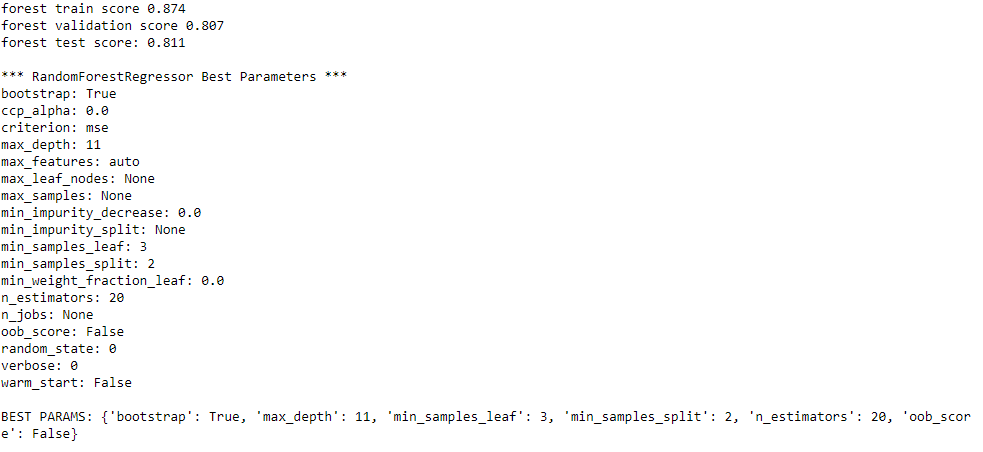

Top 3 best hyperparameter:

1. 0.8205729 (+/-0.011) for {'bootstrap': True, 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 20, 'oob_score': False}
2. 0.8199527 (+/-0.016) for {'bootstrap': True, 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20, 'oob_score': False}
3. 0.8187558 (+/-0.011) for {'bootstrap': True, 'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 20, 'oob_score': False}

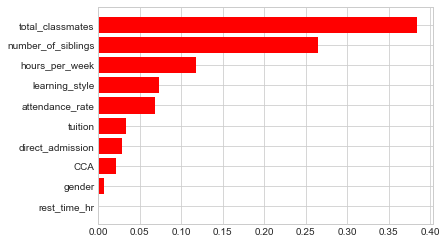

In [63]:
print_impt_feat(forest, 'r')

## 7.2.1 Random Forest Regressor: Use top 3 best hyperparameter to evaluate results on validation set

In [64]:
# Best 3 Random Forest Model
forest1 = RandomForestRegressor(bootstrap=True, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False)
forest1.fit(X_train, y_train_con.values.ravel())

forest2 = RandomForestRegressor(bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False)
forest2.fit(X_train, y_train_con.values.ravel())

forest3 = RandomForestRegressor(bootstrap=True, max_depth=11, min_samples_leaf=5, min_samples_split=2, n_estimators=20, oob_score=False)
forest3.fit(X_train, y_train_con.values.ravel())

RandomForestRegressor(max_depth=11, min_samples_leaf=5, n_estimators=20)

In [65]:
# Fit validation set into Best 3 Random Forest Regression Model and find the best model

for mdl in [forest1, forest2, forest3]:
    y_pred = mdl.predict(X_val)
    r2 = round(r2_score(y_val_con, y_pred),5)
    mae = round(mean_absolute_error(y_val_con, y_pred),5)
    mse = round(mean_squared_error(y_val_con, y_pred),5)
    print('MAX DEPTH: {} / min_samples_leaf: {} / n_estimators: {}'.format(mdl.max_depth, mdl.min_samples_leaf, mdl.n_estimators))
    print('r2_score: {} / mean_absolute_error: {} / mean_squared_error: {}\n'.format(r2, mae, mse))

MAX DEPTH: 11 / min_samples_leaf: 3 / n_estimators: 20
r2_score: 0.80799 / mean_absolute_error: 4.1141 / mean_squared_error: 36.30444

MAX DEPTH: 11 / min_samples_leaf: 1 / n_estimators: 20
r2_score: 0.81075 / mean_absolute_error: 4.0784 / mean_squared_error: 35.78298

MAX DEPTH: 11 / min_samples_leaf: 5 / n_estimators: 20
r2_score: 0.80651 / mean_absolute_error: 4.13555 / mean_squared_error: 36.58475



Best model from validation set: forest2

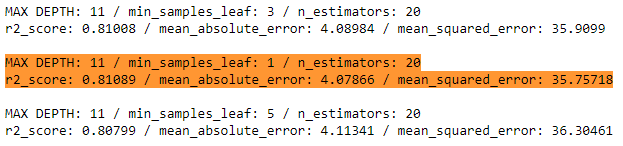

## 7.2.2 Random Forest: Evaluate test set on the best 3 model to confirm the performance of validation set

In [66]:
# Fit test set into Best 3 Random Forest Regression Model and see if the results matches the validation set

for mdl in [forest1, forest2, forest3]:
    y_pred = mdl.predict(X_test)
    r2 = round(r2_score(y_test_con, y_pred),5)
    mae = round(mean_absolute_error(y_test_con, y_pred),5)
    mse = round(mean_squared_error(y_test_con, y_pred),5)
    print('MAX DEPTH: {} / min_samples_leaf: {} / n_estimators: {}'.format(mdl.max_depth, mdl.min_impurity_decrease, mdl.min_samples_leaf))
    print('r2_score: {} / mean_absolute_error: {} / mean_squared_error: {}\n'.format(r2, mae, mse))

MAX DEPTH: 11 / min_samples_leaf: 0.0 / n_estimators: 3
r2_score: 0.81026 / mean_absolute_error: 4.11483 / mean_squared_error: 35.82615

MAX DEPTH: 11 / min_samples_leaf: 0.0 / n_estimators: 1
r2_score: 0.81301 / mean_absolute_error: 4.05226 / mean_squared_error: 35.30641

MAX DEPTH: 11 / min_samples_leaf: 0.0 / n_estimators: 5
r2_score: 0.80735 / mean_absolute_error: 4.12913 / mean_squared_error: 36.37638



Results from test set is similar to validation set. Hence the best model here is forest2.

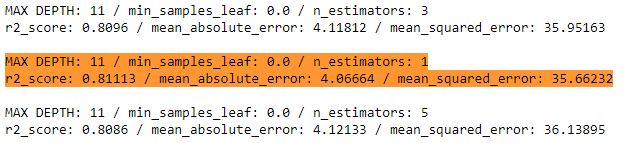

# 7.3 KNeighbors Regressor model

In [67]:
# RandomForestRegressor() model
knn_regr = KNeighborsRegressor()

#fit model
knn_regr.fit(X_train,y_train_con.values.ravel())
y_train_pred = knn_regr.predict(X_train)
y_val_pred = knn_regr.predict(X_val)
y_test_pred = knn_regr.predict(X_test)

#print score
print('forest train score %.3f\nforest validation score %.3f\nforest test score: %.3f' % (
    forest.score(X_train,y_train_con), forest.score(X_val, y_val_con), forest.score(X_test, y_test_con)))

forest train score 0.875
forest validation score 0.807
forest test score: 0.811


In [68]:
# Search for hypermeter using GridSearchCV for Random Forest Regressor optimization
param_grid_rf = dict(n_neighbors=[5, 8],
                     leaf_size= [8, 10, 12, 30],
                     weights=['uniform', 'distance'],
                     algorithm=['auto', 'ball_tree', 'kd_tree'])

knn_regr = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid_rf, cv=5, verbose=3)

#fit model
knn_regr.fit(X_train,y_train_con.values.ravel())

#print score
print('\n\nforest train score %.3f\nforest validation score %.3f\nforest test score: %.3f' % (
    forest.score(X_train,y_train_con), forest.score(X_val,y_val_con), forest.score(X_test, y_test_con)))

print_best_params(knn_regr)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END algorithm=auto, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.725 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.714 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.685 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.723 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.701 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=8, n_neighbors=5, weights=distance;, score=0.726 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=8, n_neighbors=5, weights=distance;, score=0.706 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=8, n_neighbors=5, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=8, n_neighbors=5, weights=distance;, score=0.713

[CV 3/5] END algorithm=auto, leaf_size=30, n_neighbors=8, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=30, n_neighbors=8, weights=distance;, score=0.710 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=30, n_neighbors=8, weights=distance;, score=0.687 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.727 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.715 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.696 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.721 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.713 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=8, n_neighbors=5, weights=distance;, score=0.728 total time=   0.0s
[CV 2/5] 

[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=8, weights=uniform;, score=0.685 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=8, weights=uniform;, score=0.719 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=8, weights=uniform;, score=0.706 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=8, weights=distance;, score=0.728 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=8, weights=distance;, score=0.706 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=8, weights=distance;, score=0.686 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=8, weights=distance;, score=0.712 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=8, weights=distance;, score=0.691 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=8, n_neighbors=5, weights=uniform;, score=0.725 total tim

[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, weights=distance;, score=0.682 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, weights=distance;, score=0.716 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, weights=distance;, score=0.687 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, weights=uniform;, score=0.724 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, weights=uniform;, score=0.710 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, weights=uniform;, score=0.679 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, weights=uniform;, score=0.715 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, weights=uniform;, score=0.702 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=8, weights=distance;, score=0.727 total time=   0.0s
[CV 2/

Top 3 best hyperparameter:

1. 0.7145432 (+/-0.021) for {'algorithm': 'ball_tree', 'leaf_size': 8, 'n_neighbors': 5, 'weights': 'uniform'}
2. 0.7145432 (+/-0.021) for {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
3. 0.7145432 (+/-0.021) for {'algorithm': 'ball_tree', 'leaf_size': 12, 'n_neighbors': 5, 'weights': 'uniform'}

## 7.3.1 KNeighbors Regressor: Use top 3 best hyperparameter to evaluate results on validation set

In [69]:
# Best 3 Random Forest Model
knn_regr1 = KNeighborsRegressor(leaf_size=8, algorithm='ball_tree')
knn_regr1.fit(X_train, y_train_con.values.ravel())

knn_regr2 = KNeighborsRegressor(leaf_size=10, algorithm='ball_tree')
knn_regr2.fit(X_train, y_train_con.values.ravel())

knn_regr3 = KNeighborsRegressor(leaf_size=12, algorithm='ball_tree')
knn_regr3.fit(X_train, y_train_con.values.ravel())

KNeighborsRegressor(algorithm='ball_tree', leaf_size=12)

In [70]:
# Fit validation set into Best 3 Random Forest Regression Model and find the best model

for mdl in [knn_regr1, knn_regr2, knn_regr3]:
    y_pred = mdl.predict(X_val)
    r2 = round(r2_score(y_val_con, y_pred),5)
    mae = round(mean_absolute_error(y_val_con, y_pred),5)
    mse = round(mean_squared_error(y_val_con, y_pred),5)
    print('leaf_size: {} / algorithm: {} '.format(mdl.leaf_size, mdl.algorithm))
    print('r2_score: {} / mean_absolute_error: {} / mean_squared_error: {}\n'.format(r2, mae, mse))

leaf_size: 8 / algorithm: ball_tree 
r2_score: 0.70955 / mean_absolute_error: 5.40541 / mean_squared_error: 54.91829

leaf_size: 10 / algorithm: ball_tree 
r2_score: 0.7084 / mean_absolute_error: 5.41085 / mean_squared_error: 55.13455

leaf_size: 12 / algorithm: ball_tree 
r2_score: 0.7084 / mean_absolute_error: 5.41085 / mean_squared_error: 55.13455



Best model from validation set: knn_regr1

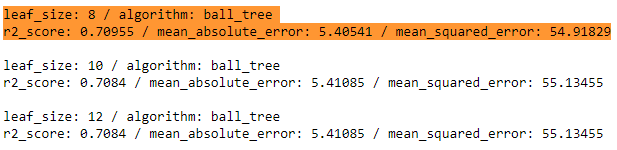

## 7.3.2 KNeighbors Regressor: Evaluate test set on the best 3 model to confirm the performance of validation set

In [71]:
# Fit test set into Best 3 Random Forest Regression Model and see if the results matches the validation set

for mdl in [knn_regr1, knn_regr2, knn_regr3]:
    y_pred = mdl.predict(X_test)
    r2 = round(r2_score(y_test_con, y_pred),5)
    mae = round(mean_absolute_error(y_test_con, y_pred),5)
    mse = round(mean_squared_error(y_test_con, y_pred),5)
    print('leaf_size: {} / algorithm: {} '.format(mdl.leaf_size, mdl.algorithm))
    print('r2_score: {} / mean_absolute_error: {} / mean_squared_error: {}\n'.format(r2, mae, mse))

leaf_size: 8 / algorithm: ball_tree 
r2_score: 0.70904 / mean_absolute_error: 5.48405 / mean_squared_error: 54.93875

leaf_size: 10 / algorithm: ball_tree 
r2_score: 0.70778 / mean_absolute_error: 5.47763 / mean_squared_error: 55.17601

leaf_size: 12 / algorithm: ball_tree 
r2_score: 0.70778 / mean_absolute_error: 5.47763 / mean_squared_error: 55.17601



Results from test set is similar to validation set. Hence the best model here is knn_regr1.

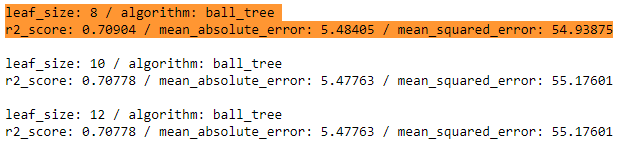

## 7.4 Results and findings on Regression models

The best estimator for all the Regressor model have the same weightage on the importance of features where the top 3 are  in order:
1. total_classmate  
2. number_of_siblings
3. hours_per_week 

These 3 features are reflected in our heatmap showing correlation strength of 0.5, 0.4 and 0.4 respectively.We can see that regression models decides the importance of a feature based on correlation results.

From our train dataset, we manage to find the hyperparameter that gave us the best performance to tune our model. We pick the best 3 models based on their performance (r-squared score, mean squared error and mean absolute error) and feed our validation data find the best performing model. Lastly, we feed our test data set into the final choosen model chosen and see that the performance is close to what the validation data set gets. \
\

Generally, a higher r-squared indicates a better fit for the model. And we want the error (mean squared error and mean absolute error) to be low.
The best performing regression model here is the Random Forest, followed by decision tree and KNeigbour.

# 8. Classification Modeling

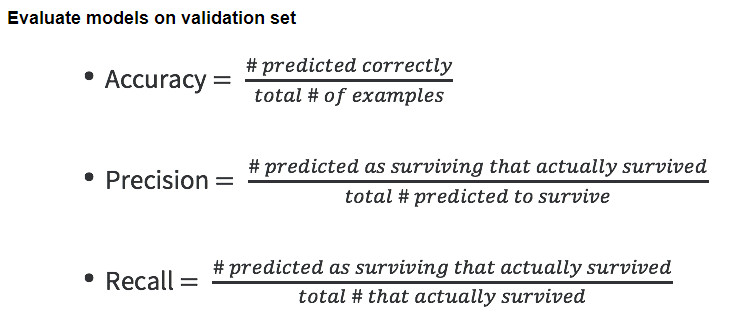

## 8.1 Decision Tree Classifier

In [72]:
# Search for hypermeter using GridSearchCV for Decision Tree Classifier optimization

dt_clf = DecisionTreeClassifier()
parameters = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 8, 16, 32, None],
    'max_features': ['auto','sqrt', 'log2', None],    
}
cv_dt_clf = GridSearchCV(dt_clf, parameters, cv=5)
cv_dt_clf.fit(X_train, y_train_cat.values.ravel())

# print_results(cv_dt_clf)
print_best_params(cv_dt_clf)


*** DecisionTreeClassifier Best Parameters ***
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 8
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_impurity_split: None
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: None
splitter: best

0.9314444 (+/-0.031) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'best'}
0.9053333 (+/-0.035) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'splitter': 'random'}
0.9194444 (+/-0.04) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'splitter': 'best'}
0.8882222 (+/-0.015) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'splitter': 'random'}
0.9353333 (+/-0.028) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'best'}
0.8986667 (+/-0.032) for {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'random'}
0.9488889 (+/-0.012) for {'criterion': 'gini

Top 3 best hyperparameter:
    
1. 0.9588889 (+/-0.011) for {'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'splitter': 'best'}
2. 0.9534444 (+/-0.012) for {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}
3. 0.9512222 (+/-0.005) for {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'splitter': 'best'}

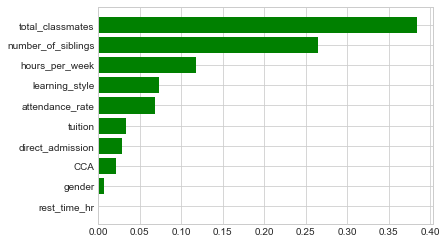

In [73]:
print_impt_feat(forest, 'g')

In [74]:
evaluate_model('Train set     ', cv_dt_clf.best_estimator_, X_train, y_train_cat)
evaluate_model('Validation set', cv_dt_clf.best_estimator_, X_val, y_val_cat)
evaluate_model('Test set      ', cv_dt_clf.best_estimator_, X_test, y_test_cat)

Train set      -- 	Accuracy: 0.964 / Precision: 0.967 / Recall: 0.993 / Latency: 4.0ms
Validation set -- 	Accuracy: 0.954 / Precision: 0.962 / Recall: 0.987 / Latency: 2.0ms
Test set       -- 	Accuracy: 0.959 / Precision: 0.967 / Recall: 0.988 / Latency: 1.0ms


### 8.1.1 Decesion Tree Classifier: Use top 3 best hyperparameter to evaluate results on validation set

In [75]:
# Best 3 Random Forest Model
dt_class1 = DecisionTreeClassifier(max_features=None, max_depth=8)
dt_class1.fit(X_train, y_train_cat.values.ravel())

dt_class2 = DecisionTreeClassifier(max_features=None, max_depth=4)
dt_class2.fit(X_train, y_train_cat.values.ravel())

dt_class3 = DecisionTreeClassifier(max_features='log2', max_depth=8)
dt_class3.fit(X_train, y_train_cat.values.ravel())

DecisionTreeClassifier(max_depth=8, max_features='log2')

In [76]:
# Fit validation set into Best 3 Random Forest Model and find the best model

for mdl in [dt_class1, dt_class2, dt_class3]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val_cat, y_pred), 3)
    precision = round(precision_score(y_val_cat, y_pred), 3)
    recall = round(recall_score(y_val_cat, y_pred), 3)
    print('MAX DEPTH: {} / max_features: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.max_features,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 8 / max_features: None -- A: 0.954 / P: 0.962 / R: 0.987
MAX DEPTH: 4 / max_features: None -- A: 0.948 / P: 0.957 / R: 0.986
MAX DEPTH: 8 / max_features: log2 -- A: 0.951 / P: 0.96 / R: 0.986


Best model from validation set: dt_class1

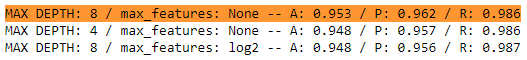

### 8.1.2 Decesion Tree Classifier: Evaluate test set on the best 3 model to confirm the performance of validation set   

In [77]:
# Fit test set into Best 3 Decision Tree Model and see if the results matches the validation set

for mdl in [dt_class1, dt_class2, dt_class3]:
    y_pred = mdl.predict(X_test)
    accuracy = round(accuracy_score(y_test_cat, y_pred), 3)
    precision = round(precision_score(y_test_cat, y_pred), 3)
    recall = round(recall_score(y_test_cat, y_pred), 3)
    print('MAX DEPTH: {} / max_features: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.max_features,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 8 / max_features: None -- A: 0.959 / P: 0.967 / R: 0.988
MAX DEPTH: 4 / max_features: None -- A: 0.955 / P: 0.962 / R: 0.988
MAX DEPTH: 8 / max_features: log2 -- A: 0.956 / P: 0.964 / R: 0.987


Results from test set is similar to validation set. Hence the best model here is dt_class1.
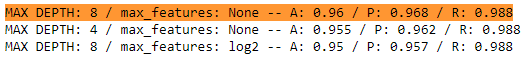

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      1076
           1       0.97      0.99      0.98      7924

    accuracy                           0.96      9000
   macro avg       0.95      0.87      0.91      9000
weighted avg       0.96      0.96      0.96      9000



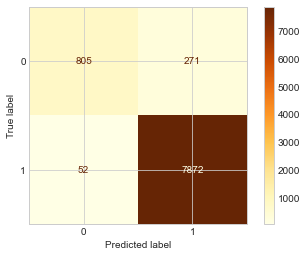

In [78]:
cls_report_confusion_matrix(cv_dt_clf)

## 8.2 Random Forest Classifier

Run GridSearch to look for best performance parameters.

In [79]:
# Search for hypermeter using GridSearch for Random Forest Classifier optimization

rfc = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [8, 16, 32, None]
}
cv_rfc = GridSearchCV(rfc, parameters, cv=5)
cv_rfc.fit(X_train, y_train_cat.values.ravel())

print_best_params(cv_rfc)


*** RandomForestClassifier Best Parameters ***
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 16
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_impurity_split: None
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 16
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False

0.9557778 (+/-0.015) for {'max_depth': 8, 'n_estimators': 8}
0.9547778 (+/-0.011) for {'max_depth': 8, 'n_estimators': 16}
0.9558889 (+/-0.012) for {'max_depth': 8, 'n_estimators': 32}
0.9557778 (+/-0.014) for {'max_depth': 8, 'n_estimators': 64}
0.955 (+/-0.011) for {'max_depth': 8, 'n_estimators': 128}
0.9554444 (+/-0.012) for {'max_depth': 8, 'n_estimators': 256}
0.956 (+/-0.012) for {'max_depth': 8, 'n_estimators': 512}
0.9563333 (+/-0.01) for {'max_depth': 16, 'n_estimators': 8}
0.9592222 (+/-0.013) for {'max_depth': 16, 'n_estimators': 16}
0.9578889 (+/-0.015) for {'max_depth': 16, 

Top 3 best hyperparameter:

1. 0.959222 (+/-0.012) for {'max_depth': 16, 'n_estimators': 16}
2. 0.959 (+/-0.012) for {'max_depth': 16, 'n_estimators': 32}
3. 0.958556 (+/-0.011) for {'max_depth': 16, 'n_estimators': 512}

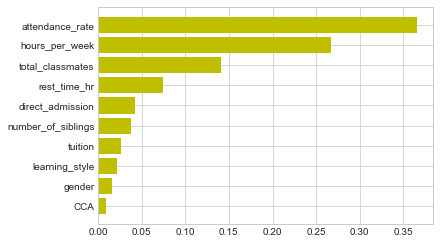

In [80]:
# Generate feature importance plot
print_impt_feat(cv_rfc, 'y')

In [81]:
# Evaluate all train, validation and test set on the best model.

evaluate_model('Train set     ', cv_rfc.best_estimator_, X_train, y_train_cat)
evaluate_model('Validation set', cv_rfc.best_estimator_, X_val, y_val_cat)
evaluate_model('Test set      ', cv_rfc.best_estimator_, X_test, y_test_cat)

Train set      -- 	Accuracy: 0.984 / Precision: 0.984 / Recall: 0.998 / Latency: 25.9ms
Validation set -- 	Accuracy: 0.956 / Precision: 0.969 / Recall: 0.982 / Latency: 11.0ms
Test set       -- 	Accuracy: 0.956 / Precision: 0.971 / Recall: 0.979 / Latency: 10.0ms


### 8.2.1 Random Forest: Use top 3 best hyperparameter to evaluate results on validation set

In [82]:
# Best 3 Random Forest Model
forest_class1 = RandomForestClassifier(n_estimators=16, max_depth=16)
forest_class1.fit(X_train, y_train_cat.values.ravel())

forest_class2 = RandomForestClassifier(n_estimators=32, max_depth=16)
forest_class2.fit(X_train, y_train_cat.values.ravel())

forest_class3 = RandomForestClassifier(n_estimators=512, max_depth=16)
forest_class3.fit(X_train, y_train_cat.values.ravel())

RandomForestClassifier(max_depth=16, n_estimators=512)

In [83]:
# Fit validation set into Best 3 Random Forest Model and find the best model
for mdl in [forest_class1, forest_class2, forest_class3]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val_cat, y_pred), 3)
    precision = round(precision_score(y_val_cat, y_pred), 3)
    recall = round(recall_score(y_val_cat, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 16 / # OF EST: 16 -- A: 0.957 / P: 0.969 / R: 0.983
MAX DEPTH: 16 / # OF EST: 32 -- A: 0.957 / P: 0.969 / R: 0.983
MAX DEPTH: 16 / # OF EST: 512 -- A: 0.957 / P: 0.969 / R: 0.983


Best model from validation set: forest_class3:

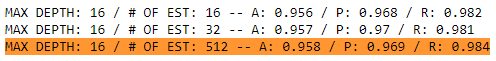

### 8.2.2 Random Forest: Evaluate test set on the best 3 model to confirm the performance of validation set   
    

In [84]:
# Fit test set into Best 3 Random Forest Model and see if the results matches the validation set

for mdl in [forest_class1, forest_class2, forest_class3]:
    y_pred = mdl.predict(X_test)
    accuracy = round(accuracy_score(y_test_cat, y_pred), 3)
    precision = round(precision_score(y_test_cat, y_pred), 3)
    recall = round(recall_score(y_test_cat, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 16 / # OF EST: 16 -- A: 0.956 / P: 0.972 / R: 0.978
MAX DEPTH: 16 / # OF EST: 32 -- A: 0.956 / P: 0.972 / R: 0.978
MAX DEPTH: 16 / # OF EST: 512 -- A: 0.957 / P: 0.972 / R: 0.98


Results from test set is similar to validation set. Hence the best model here is forest_class3.
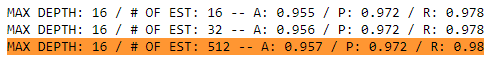

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1076
           1       0.98      1.00      0.99      7924

    accuracy                           0.98      9000
   macro avg       0.99      0.94      0.96      9000
weighted avg       0.98      0.98      0.98      9000



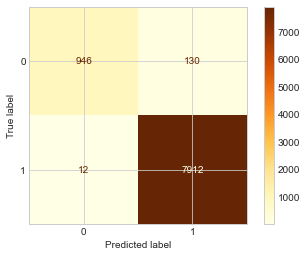

In [85]:
cls_report_confusion_matrix(cv_rfc)

## 8.3 KNeighbors Classifier

In [86]:
# Search for hypermeter using GridSearch for KNeighbors Classifier optimization

neigh = KNeighborsClassifier()
parameters = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'n_neighbors': [4, 8, 10, 12],
    'weights': ['uniform','distance'],    
}
cv_neigh = GridSearchCV(neigh, parameters, cv=5)
cv_neigh.fit(X_train, y_train_cat.values.ravel())

# print_results(cv_neigh)
print_best_params(cv_neigh)


*** KNeighborsClassifier Best Parameters ***
algorithm: ball_tree
leaf_size: 30
metric: minkowski
metric_params: None
n_jobs: None
n_neighbors: 12
p: 2
weights: uniform

0.9411111 (+/-0.009) for {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}
0.9406667 (+/-0.008) for {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}
0.9466667 (+/-0.011) for {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}
0.9457778 (+/-0.009) for {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}
0.9478889 (+/-0.01) for {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}
0.9463333 (+/-0.008) for {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
0.9474444 (+/-0.012) for {'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'uniform'}
0.9454444 (+/-0.009) for {'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'distance'}
0.939 (+/-0.009) for {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'uniform'}
0.9397778 (+/-0.007) for {'algorithm':

Top 3 best hyperparameter:

1. 0.948 (+/-0.011) for {'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'uniform'}
2. 0.9478889 (+/-0.01) for {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}
3. 0.9478889 (+/-0.01) for {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform'}
4. 0.9478889 (+/-0.01) for {'algorithm': 'kd_tree', 'n_neighbors': 10, 'weights': 'uniform'}


In [87]:
# Evaluate all train, validation and test set on the best model.

evaluate_model('Train set     ', cv_rfc.best_estimator_, X_train, y_train_cat)
evaluate_model('Validation set', cv_rfc.best_estimator_, X_val, y_val_cat)
evaluate_model('Test set      ', cv_rfc.best_estimator_, X_test, y_test_cat)

Train set      -- 	Accuracy: 0.984 / Precision: 0.984 / Recall: 0.998 / Latency: 28.9ms
Validation set -- 	Accuracy: 0.956 / Precision: 0.969 / Recall: 0.982 / Latency: 11.0ms
Test set       -- 	Accuracy: 0.956 / Precision: 0.971 / Recall: 0.979 / Latency: 11.0ms


### 8.3.1 KNeighbors Classifier: Use top 3 best hyperparameter to evaluate results on validation set

In [88]:
# Best 3 Random Forest Model
knn_class1 = KNeighborsClassifier(n_neighbors=10, algorithm='brute')
knn_class1.fit(X_train, y_train_cat.values.ravel())

knn_class2 = KNeighborsClassifier(n_neighbors=30, algorithm='auto')
knn_class2.fit(X_train, y_train_cat.values.ravel())

knn_class3 = KNeighborsClassifier(n_neighbors=10, algorithm= 'ball_tree')
knn_class3.fit(X_train, y_train_cat.values.ravel())

knn_class4 = KNeighborsClassifier(n_neighbors=10, algorithm= 'kd_tree')
knn_class4.fit(X_train, y_train_cat.values.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)

In [89]:
# Fit validation set into Best 3 Random Forest Model and find the best model
for mdl in [knn_class1, knn_class2, knn_class3, knn_class4]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val_cat, y_pred), 3)
    precision = round(precision_score(y_val_cat, y_pred), 3)
    recall = round(recall_score(y_val_cat, y_pred), 3)
    print('n_neighbors: {} / algorithm: {} -- A: {} / P: {} / R: {}'.format(mdl.n_neighbors,
                                                                         mdl.algorithm,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

n_neighbors: 10 / algorithm: brute -- A: 0.95 / P: 0.961 / R: 0.983
n_neighbors: 30 / algorithm: auto -- A: 0.945 / P: 0.953 / R: 0.988
n_neighbors: 10 / algorithm: ball_tree -- A: 0.95 / P: 0.962 / R: 0.984
n_neighbors: 10 / algorithm: kd_tree -- A: 0.948 / P: 0.96 / R: 0.982


Best model from validation set knn_class3:

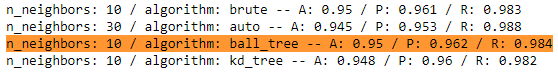

### 8.3.2 KNeighbors Classifier: Evaluate test set on the best 3 model to confirm the performance of validation set   
    

In [90]:
# Fit test set into Best 3 Random Forest Model and see if the results matches the validation set

for mdl in [knn_class1, knn_class2, knn_class3, knn_class4]:
    y_pred = mdl.predict(X_test)
    accuracy = round(accuracy_score(y_test_cat, y_pred), 3)
    precision = round(precision_score(y_test_cat, y_pred), 3)
    recall = round(recall_score(y_test_cat, y_pred), 3)
    print('n_neighbors: {} / algorithm: {} -- A: {} / P: {} / R: {}'.format(mdl.n_neighbors,
                                                                         mdl.algorithm,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

n_neighbors: 10 / algorithm: brute -- A: 0.946 / P: 0.958 / R: 0.982
n_neighbors: 30 / algorithm: auto -- A: 0.947 / P: 0.953 / R: 0.989
n_neighbors: 10 / algorithm: ball_tree -- A: 0.946 / P: 0.959 / R: 0.982
n_neighbors: 10 / algorithm: kd_tree -- A: 0.947 / P: 0.959 / R: 0.983


Results from test set is slightly different from the validation set. 
The best model for test set is is knn_class2.

Due to the objective here, our target is to pick weaker student out, therefore recall is more valuable than precision as we will want to identify majority of the weaker students in order to help them.

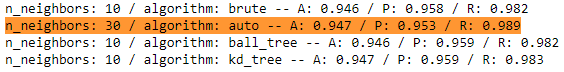

              precision    recall  f1-score   support

           0       0.88      0.69      0.78      1076
           1       0.96      0.99      0.97      7924

    accuracy                           0.95      9000
   macro avg       0.92      0.84      0.87      9000
weighted avg       0.95      0.95      0.95      9000



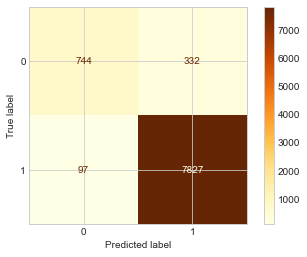

In [91]:
cls_report_confusion_matrix(cv_neigh)

## 8.4 Results and findings on Classification models

The best estimator for all the Regressor model have the same weightage on the importance of features where the top 3 are  in order:
1. attendance rate  
2. hours_per_week
3. total_classmate

These 3 features are *NOT* reflected in our heatmap, the correlation strength showed are 0.3, 0.1 and 0.5 respectively.We can see that classification models does not follows the importance of a feature based on correlation results.

Similar to regression method, from our train dataset, we manage to find the hyperparameter that gave us the best performance to tune our model. We pick the best 3 models based on their performance (accuracy, precision, recall and f1-score) and feed our validation data find the best performing model. Lastly, we feed our test data set into the final choosen model chosen and see that the performance is close to what the validation data set gets. \

We want all accuracy, precision and recall to be high. However, there is often a trade off between recision and recall. For the purpose of our situation here, recall (ratio of correctly predicted positive observations to the all observations in actual class) is more important for our purpose as we do not one to miss out a weak student compared to precision (ratio of correctly predicted positive observations to the total predicted positive observations).\
\
The best performing classification model here is the Random Forest, followed by decision tree and KNeigbour.

## 9. Conclusion

Classification works better for our case here because majority of the features do not have linear relationship, which makes it harder for regression to work. 

One every obvious differences in these 2 category of models are the selection of importance features. Over here, classification perform much better than regression because they manage to identify the actualy features that can actually help to identify the weaker students which are not revealed inside the correlation matrix.